# Customizing Plots using matplotlib
<hr style="height:1px;border:none;color:#666;background-color:#666;" />

Although `seaborn` allows us to quickly create many types of plots, it does not give us fine-grained control over the chart. For example, we cannot use seaborn to modify a plot's title, change x or y-axis labels, or add annotations to a plot. Instead, we must use the matplotlib library that seaborn is based off of.

`matplotlib` provides basic building blocks for creating plots in Python. Although it gives great control, it is also more verbose — recreating the seaborn plots from the previous sections in matplotlib would take many lines of code. In fact, we can think of seaborn as a set of useful shortcuts to create matplotlib plots. Although we prefer to prototype plots in seaborn, in order to customize plots for communicating our findings we will need to learn basic pieces of matplotlib.

Before we look at our first simple example, we must activate matplotlib support in the notebook:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set()

# This line allows matplotlib plots to appear as images in the notebook
# instead of in a separate window.
%matplotlib inline

# plt is a commonly used shortcut for matplotlib
import matplotlib.pyplot as plt

## Customizing Figures and Axes
<hr>

In order to create a plot in `matplotlib`, we create a *figure*, then add an *axes* to the figure. In matplotlib, an axes is a single chart, and figures can contain multiple axes in a tablular layout. An axes contains *marks*, the lines or patches drawn on the plot.

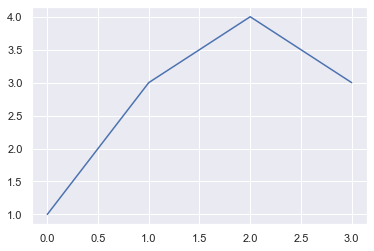

In [2]:
# Create a figure
figure = plt.figure()

# Add an axes to the figure. The second and third arguments create a table
# with 1 row and 1 column. The first argument places the axes in the first
# cell of the table.
axis = figure.add_subplot(1, 1, 1)

# Create a line plot on the axes
axis.plot([0, 1, 2, 3], [1, 3, 4, 3])

# Show the plot. This will automatically get called in a Jupyter notebook
# so we'll omit it in future cells
plt.show()

To customize the plot, we can use other methods on the axes object, below we will create some datapoints to plot using the numpy library we learnt in preceding section:

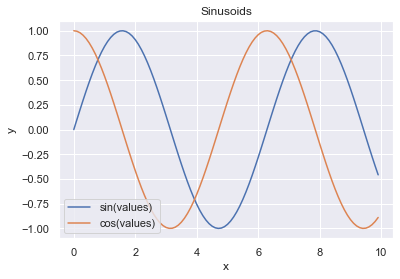

In [4]:
figure = plt.figure()
axis = figure.add_subplot(1, 1, 1)

values = np.arange(0, 10, 0.1)

# Setting the label kwarg lets us generate a legend
axis.plot(values, np.sin(values), label='sin(values)')
axis.plot(values, np.cos(values), label='cos(values)')
axis.legend()

axis.set_title('Sinusoids')
axis.set_xlabel('x')
axis.set_ylabel('y');

The `plt` module has analogous methods to an axes, so we can recreate one of the plots above using `plt` shorthands.

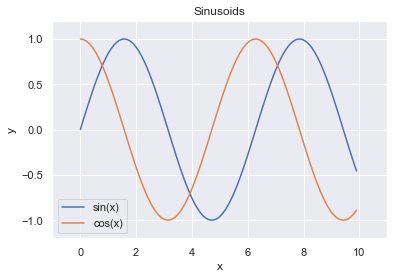

In [5]:
x = np.arange(0, 10, 0.1)

plt.plot(x, np.sin(x), label='sin(x)')
plt.plot(x, np.cos(x), label='cos(x)')
plt.legend()

# Shorthand for ax.set_title
plt.title('Sinusoids')
plt.xlabel('x')
plt.ylabel('y')

# Set the x and y-axis limits
plt.xlim(-1, 11)
plt.ylim(-1.2, 1.2);

## Customizing Marks
<hr>

To change properties of the plot marks themselves (e.g. the lines in the plot above), we can pass additional arguments into `plt.plot`.

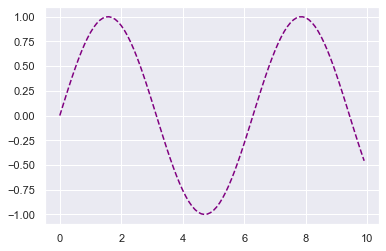

In [6]:
plt.plot(x, np.sin(x), linestyle='--', color='purple');

Checking the `matplotlib` documentation is the easiest way to figure out which arguments are available for each method. 

## Annotating our charts
<hr>

In matplotlib, text can be added either relative to an individual axis object or to the whole figure.

These commands add text to the Axes:

- `set_title()` - add a title
- `set_xlabel()` - add an axis label to the x-axis
- `set_ylabel()` - add an axis label to the y-axis
- `text()` - add text at an arbitrary location
- `annotate()` - add an annotation, with optional arrow

And these act on the whole figure:

- `figtext()` - add text at an arbitrary location
- `suptitle()` - add a title

And any text field can contain [LaTeX expressions](https://www.authorea.com/users/77723/articles/110898-how-to-write-mathematical-equations-expressions-and-symbols-with-latex-a-cheatsheet) for mathematics, as long as they are enclosed in `$` signs.

This example illustrates all of them:

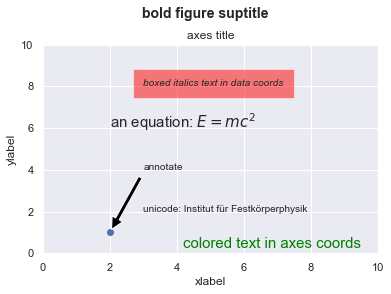

In [7]:
fig = plt.figure()
fig.suptitle('bold figure suptitle', fontsize=14, fontweight='bold')

ax = fig.add_subplot(1, 1, 1)
fig.subplots_adjust(top=0.85)
ax.set_title('axes title')

ax.set_xlabel('xlabel')
ax.set_ylabel('ylabel')

ax.text(3, 8, 'boxed italics text in data coords', style='italic',
        bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})

ax.text(2, 6, 'an equation: $E=mc^2$', fontsize=15)

ax.text(3, 2, 'unicode: Institut für Festkörperphysik')

ax.text(0.95, 0.01, 'colored text in axes coords',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='green', fontsize=15)


ax.plot([2], [1], 'o')
ax.annotate('annotate', xy=(2, 1), xytext=(3, 4),
            arrowprops=dict(facecolor='black', shrink=0.05))

ax.axis([0, 10, 0, 10]);

## Customizing a `seaborn` plot using `matplotlib`
<hr>

Now that we've seen how to use `matplotlib` to customize a plot, we can use the same methods to customize seaborn plots since seaborn creates plots using matplotlib behind-the-scenes.

In [8]:
# Load seaborn
import seaborn as sns
sns.set()
sns.set_context('talk')

# Load dataset
titanic = sns.load_dataset('titanic').dropna().reset_index(drop=True)
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
1,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
2,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
3,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
4,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True


We'll start with this plot:

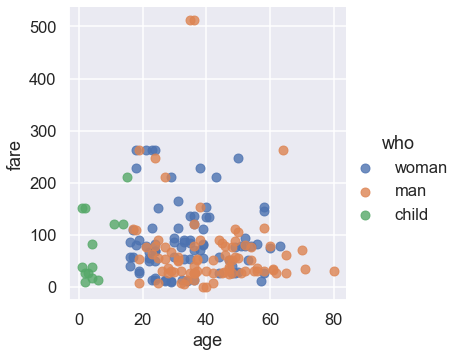

In [9]:
sns.lmplot(x='age', y='fare', hue='who', data=titanic, fit_reg=False);

We can see that the plot needs a title and better labels for the x and y-axes. In addition, the two people with the most expensive fares survived, so we can annotate them on our plot.

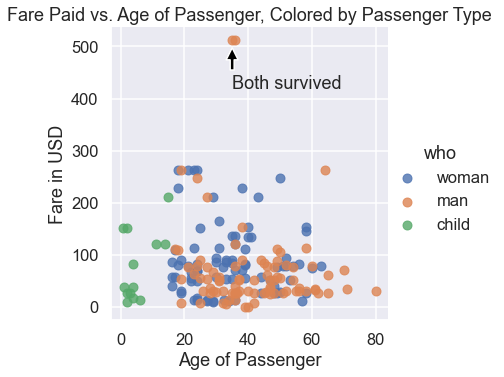

In [10]:
sns.lmplot(x='age', y='fare', hue='who', data=titanic, fit_reg=False)

plt.title('Fare Paid vs. Age of Passenger, Colored by Passenger Type')
plt.xlabel('Age of Passenger')
plt.ylabel('Fare in USD')

plt.annotate('Both survived', xy=(35, 500), xytext=(35, 420),
             arrowprops=dict(facecolor='black', shrink=0.05));

In practice, we use `seaborn` to quickly explore the data and then turn to `matplotlib` for fine-tuning once we decide on the plots to use in our reports or presentation.